# Introduction

Data scientists are able to carry out Market Basket Analysis by implementing Association Rule Mining. Association Rule Mining is a rule-based machine learning method that helps to uncover meaningful correlations between diffmerent products according to their co-occurrence in a data set.

However, one of the major pitfalls is that it consists of various formulas and parameters that may make it difficult for people without expertise in data mining

# Core Concepts


**1) Support**<br>
Support is just the plain basic probability of an event to occur. It is measured by the proportion of transactions in which an item set appears. To put it in another way, Support(A) is the number of transactions which includes A divided by the total number of transactions.

If we analyze the transaction table above, the support for cookie is 3 out of 6. That is, out of a total of 6 transactions, purchases containing cookies have occurred 3 times. or 50%.

**2) Confidence**<br>
The confidence of a consequent event given an antecedent event can be described by using conditional probability. Simply put, it is the probability of event A happening given that event B has already happened.

This can be used to describe the probability of an item being purchased when another item is already in the basket. It is measured by dividing the proportion of transactions with item X and Y, over the proportion of transactions with Y.

**3) lift**<br>
Lift is the observed to expected ratio (abbreviation o/e). Lift measures how likely an item is purchased when another item is purchased, while controlling for how popular both items are. It can be calculated by dividing the probability of both of the items occurring together by the product of the probabilities of the both individuals items occurring as if there was no association between them.

# The Apriori Algorithm

The Apriori Algorithm is one of the most popular algorithms used in association rule learning over relational databases. It identifies the items in a data set and further extends them to larger and larger item sets.<br>
However, the Apriori Algorithm only extends if the item sets are frequent, that is the probability of the itemset is beyond a certain predetermined threshold.<br>
<br>
The probability of an itemset is not frequent if:

(a) P(I) < Minimum support threshold, where I is any non-empty itemsetd<br>
(b) Any subset within the itemset has value less than minimum support.

## Steps in the Apriori Algorithm
The diagram below illustrates how the Apriori Algorithm starts building from the smallest itemset and further extends forward.

<li>The algorithm starts by generating an itemset through the Join Step, that is to generate (K+1) itemset from K-itemsets. For example, the algorithm generates Cookie, Chocolate and Cake in the first iteration.
<li>Immediately after that, the algorithm proceeds with the Prune Step, that is to remove any candidate item set that does not meet the minimum support requirement. For example, the algorithm will remove Cake if Support(Cake) is below the predetermined minimum Support.<br>
It iterates both of the steps until there are no possible further extensions left.

In [5]:
pip install mlxtend  

     ---------------------------------------- 1.4/1.4 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


# Code Implementation

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

basket = pd.read_csv('dataset.csv')
display(basket.head())

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Grouping into transactions
<li>The data set records individual item purchases in a row. We will have to group these purchases into baskets of items.
<li>After that, we will use TransactionEncoder to encode the transactions into a format that is suitable for the Apriori function.

In [10]:

basket.itemDescription = basket.itemDescription.transform(lambda x: [x])
basket = basket.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)

encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
display(transactions.head())

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Apriori and Association Rules
<li>The Apriori Algorithm will be used to generate frequent item sets. We will be specifying the minimum support to be 6 out of total transactions. The association rules are generated and we filter for Lift value > 1.5.<br>

In [11]:
frequent_itemsets = apriori(transactions, min_support= 6/len(basket), use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules.head())
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854,0.383247
1,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289,0.381761
2,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922,0.427761
3,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685,0.426767
4,(artif. sweetener),(soda),0.001938,0.097106,0.000468,0.241379,2.485725,0.000280,1.190178,0.598864


Rules identified:  190


### Visualizations
<li> To visualize our association rules, we can plot them in a 3D scatter plot. Rules that are closer to top right are the rules that can be the most meaningful to be further dived in.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Lenovo\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


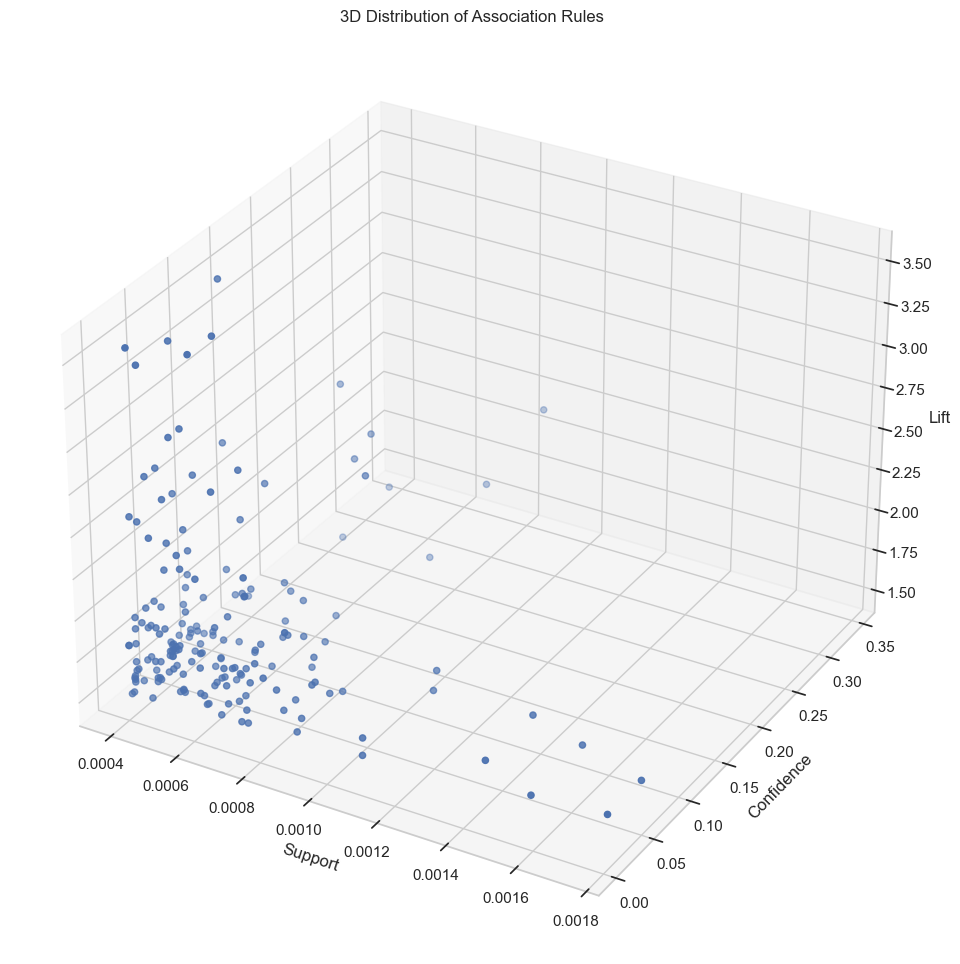

In [12]:

sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

<li>Another type of visualizations to look at the relationship between the products is via Network Graph. Let’s define a function to draw a network graph which can specify how many rules we want to show.

<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16180\3680248427.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


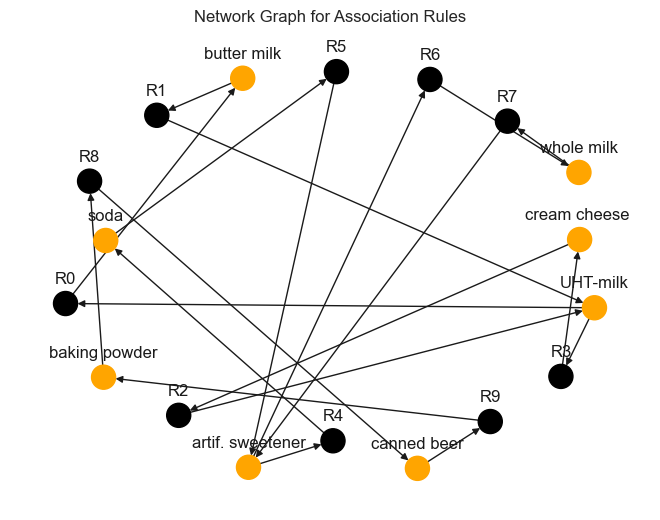

In [13]:
def draw_network(rules, rules_to_show):
  # Directional Graph from NetworkX
  network = nx.DiGraph()
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

### Business Application
Let’s say the grocery has bought up too much Whole Milk and is now worrying that the stocks will expire if they cannot be sold out in time. To make matters worse, the profit margin of Whole Milk is so low that they cannot afford to have a promotional discount without killing too much of their profits.

In [14]:
milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(milk_rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,0.539750
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523,0.461695
2,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
3,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,0.428360
